In [56]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, mutual_info_score, matthews_corrcoef, confusion_matrix, precision_score, recall_score
import pandas
import numpy
import eif
import math
from scipy import stats
from random import randint

In [2]:
def variation_of_information_score(true_class, model_class):
    return (stats.entropy(numpy.unique(true_class, return_counts=True)[1]) 
            + stats.entropy(numpy.unique(model_class, return_counts=True)[1]) 
            - 2*mutual_info_score(true_class, model_class))

def entropy(classification):
    return stats.entropy(numpy.unique(classification, return_counts=True)[1])

In [3]:
data = pandas.read_csv('test_train.csv').drop(columns = ['Unnamed: 0'])
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_is_S2,flag_is_S0,flag_is_S3,flag_is_RSTO,flag_is_RSTR,flag_is_RSTOS0,flag_is_OTH,flag_is_SH,normal,test
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,3.0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,3.0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,4.0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,2.0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,2.0
494017,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,1.0
494018,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,2.0
494019,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,3.0


In [4]:
train = numpy.array(data[data["test"] != 1].drop(columns = ["test", "normal"]))
test = numpy.array(data[data["test"] == 1].drop(columns = ["test", "normal"]))

In [5]:
model = IsolationForest(verbose=1)
model.fit(train)
model_class = model.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


In [6]:
true_class = 2*numpy.array(data[data["test"] == 1].iloc[:, -2]) - 1
rand_class = numpy.array([randint(0, 1) for i in range(len(model_class))])

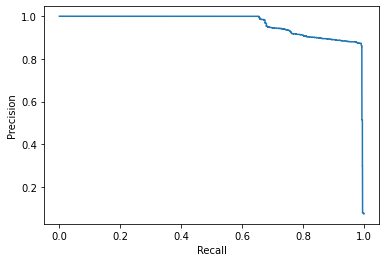

In [7]:
precision, recall, _ = precision_recall_curve(true_class, model.decision_function(test))
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()

In [8]:
mcc = matthews_corrcoef(true_class, model_class)
mcc

0.9206344699539768

In [9]:
voi = variation_of_information_score(true_class, model_class)
voi

0.0871130927576057

In [67]:
model2 = eif.iForest(train, ntrees=100, sample_size=256, ExtensionLevel=10)

In [68]:
model2_scores = model2.compute_paths(X_in=test)

In [69]:
model2_class = 2*(model2_scores < 0.5) - 1

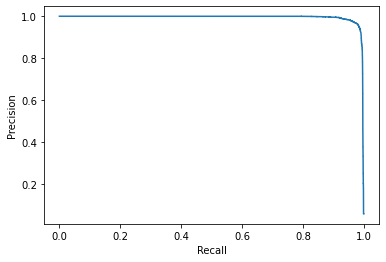

In [70]:
precision2, recall2, _ = precision_recall_curve(true_class, -model2_scores)
curve2 = PrecisionRecallDisplay(precision=precision2, recall=recall2)
curve2.plot()